In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
df = pd.read_csv('haberman.csv')
df.head()

,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [5]:
hab = df.rename(columns={'30':'Age','64' :'oper_age','1':'no_nodes','1.1':'status'})

In [6]:
hab.head()    

,Age,oper_age,no_nodes,status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [9]:
hab['status'].value_counts() #gives the count of each clssifier

1    224
2     81
Name: status, dtype: int64

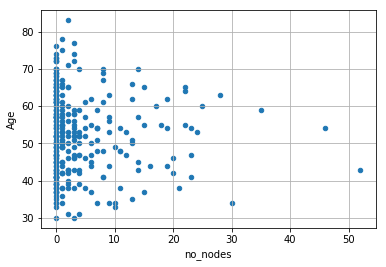

In [15]:
hab.plot(kind='scatter',x='no_nodes',y='Age') #plot the x and y values as a scatter
plt.grid()

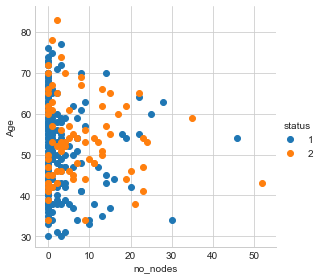

In [25]:
sns.set_style('whitegrid')
sns.FacetGrid(hab,hue='status',size=4)\    # plot the x and y values and distungish them based on colour to which class it belongs to
   .map(plt.scatter,'no_nodes','Age')\
   .add_legend();
plt.show();

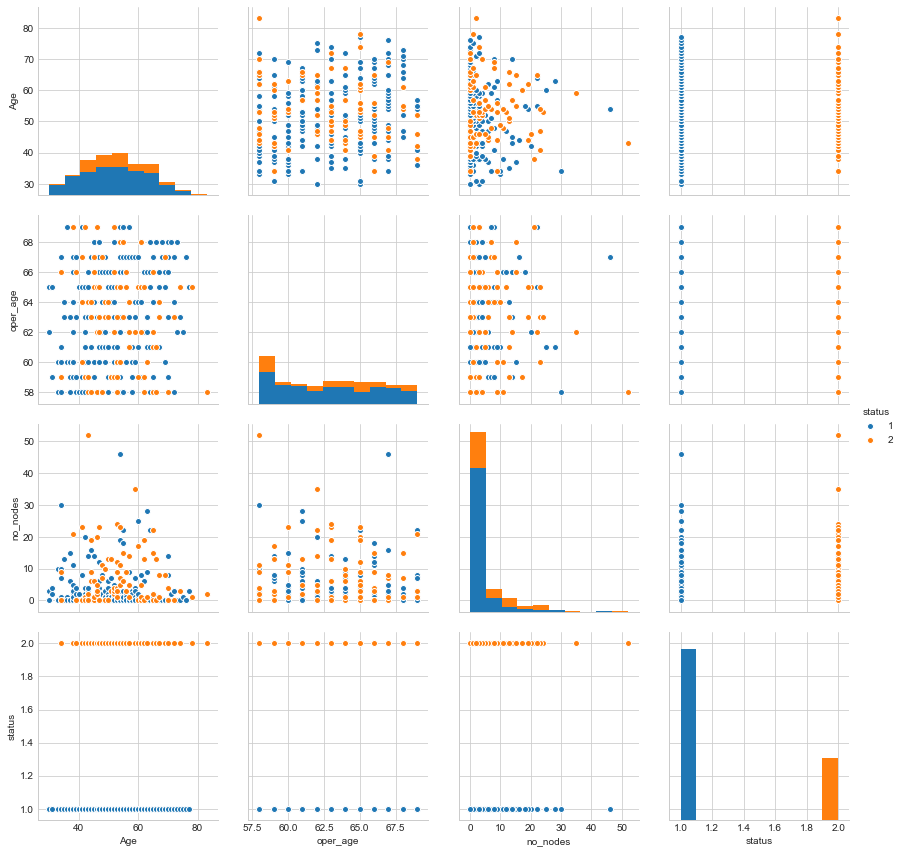

In [26]:
plt.close();
sns.set_style();
sns.pairplot(hab,hue='status',size=3); # plot all features with on another
plt.show()


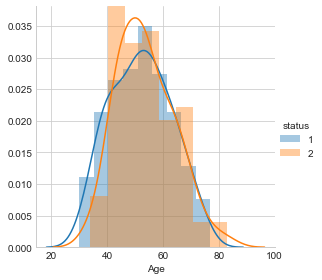

In [38]:
sns.FacetGrid(hab,hue='status',size=4)\
   .map(sns.distplot,"Age")\ # plot the single feature as histogram which gives the count of the taken feature
   .add_legend();
plt.show()

    

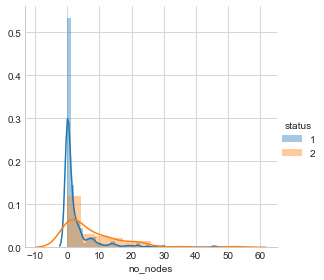

In [39]:
sns.FacetGrid(hab,hue='status',size=4)\
   .map(sns.distplot,"no_nodes")\
   .add_legend();
plt.show()

    

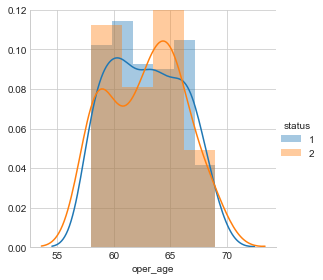

In [40]:
sns.FacetGrid(hab,hue='status',size=4)\
   .map(sns.distplot,"oper_age")\
   .add_legend();
plt.show()

    

[0.83482143 0.08035714 0.02232143 0.02678571 0.01785714 0.00446429
 0.00892857 0.         0.         0.00446429]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


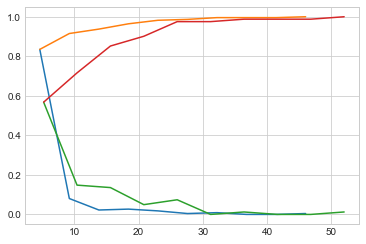

In [54]:
long_survival = hab.loc[hab["status"]==1];
short_survival = hab.loc[hab["status"]==2]

counts,bin_edges = np.histogram(long_survival['no_nodes'],bins=10,density=True)
pdf = counts/sum(counts)
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

counts,bin_edges = np.histogram(short_survival['no_nodes'],bins=10,density=True)
pdf = counts/sum(counts)
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)    # cdf gives the amount of elements lie less than the feature in the x axis

In [60]:
print("mean:")
print(np.mean(long_survival['no_nodes']))
print(np.mean(np.append(long_survival['no_nodes'],50)))
print(np.mean(short_survival['no_nodes']))
print("standard deviation:")
print(np.std(long_survival['no_nodes']))
print(np.std(short_survival['no_nodes']))



mean:
2.799107142857143
3.008888888888889
7.45679012345679
standard deviation:
5.869092706952767
9.128776076761632


In [64]:
print("median:")
print(np.median(long_survival['no_nodes']))
print(np.median(np.append(long_survival['no_nodes'],50)))
print(np.median(short_survival['no_nodes']))

print("percentile:")
print(np.percentile(long_survival['no_nodes'],np.arange(0,100,25)))
print(np.percentile(short_survival['no_nodes'],np.arange(0,100,25)))

print("90 percentile:")
print(np.percentile(long_survival['no_nodes'],90))
print(np.percentile(short_survival['no_nodes'],90))








median:
0.0
0.0
4.0
percentile:
[0. 0. 0. 3.]
[ 0.  1.  4. 11.]
90 percentile:
8.0
20.0


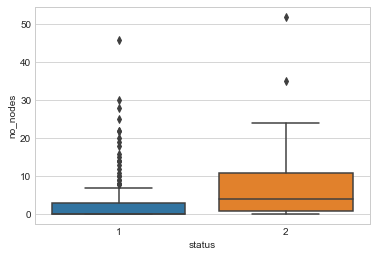

In [66]:
sns.boxplot(x='status',y ='no_nodes',data = hab) # box plot shows the percentile values
plt.show()


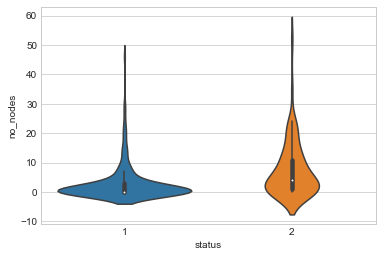

In [67]:
sns.violinplot(x='status',y ='no_nodes',data = hab) # violin plot gives the percentile values along with the spread which is cdf
plt.show()